In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading the file as per instructions
df = pd.read_csv('test.csv')

In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

In [5]:
#Let's check the null value in terms of percentage
df.isna().sum()/len(df)

customer_id                     0.000000
Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.147999
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.007982
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.098549
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
dtype: float64

In [6]:
df = df.fillna(df.mean())

In [7]:
df.isna().sum()/len(df)

customer_id                     0.000000
Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.147999
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.007982
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.000000
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
dtype: float64

In [8]:
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)

In [9]:
df.isna().sum()/len(df)

customer_id                     0.0
Name                            0.0
age                             0.0
gender                          0.0
security_no                     0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
referral_id                     0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
dtype: float64

In [10]:
df['joined_through_referral'] = df['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medium_of_operation', ylabel='count'>

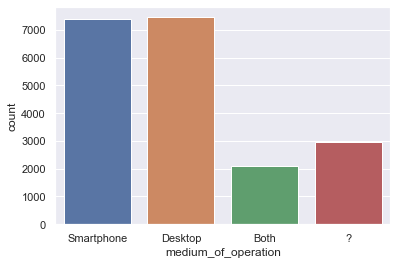

In [11]:
sns.countplot(df['medium_of_operation'])

In [12]:
df['medium_of_operation'] = df['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)

In [13]:
df['medium_of_operation'].unique()

array(['Smartphone', 'Desktop', 'Both'], dtype=object)

In [14]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
count,19919.000000,19919.000000,19919.000000,19919.000000,19919.000000
mean,36.884432,-39.216527,244.134926,29318.122196,685.968794
std,15.917311,223.274420,403.910806,19507.775429,182.438697
min,10.000000,-999.000000,-2180.780796,803.710000,-465.289977
25%,23.000000,8.000000,59.360000,14236.200000,624.480000
50%,37.000000,12.000000,161.240000,27564.050000,685.968794
75%,51.000000,16.000000,354.195000,40969.400000,757.855000
max,64.000000,26.000000,3350.060000,99995.030000,2019.671602


In [15]:
df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x:0 if x <=0 else x)

In [16]:
df['days_since_last_login'] = df['days_since_last_login'].apply(lambda x:0 if x <=0 else x)

In [17]:
df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x:0 if x <=0 else x)

<AxesSubplot:>

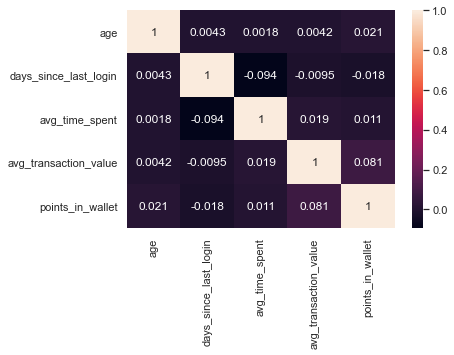

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
count,19919.000000,19919.000000,19919.000000,19919.000000,19919.000000
mean,36.884432,12.039962,279.739197,29318.122196,686.395313
std,15.917311,6.058780,336.878461,19507.775429,180.522932
min,10.000000,0.000000,0.000000,803.710000,0.000000
25%,23.000000,8.000000,59.360000,14236.200000,624.480000
50%,37.000000,12.000000,161.240000,27564.050000,685.968794
75%,51.000000,16.000000,354.195000,40969.400000,757.855000
max,64.000000,26.000000,3350.060000,99995.030000,2019.671602


<AxesSubplot:xlabel='gender', ylabel='count'>

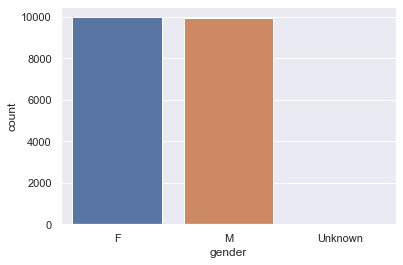

In [20]:
sns.countplot(x='gender', data=df)

In [21]:
dummy1 = pd.get_dummies(df['gender'], drop_first=True)

In [22]:
dummy2 = pd.get_dummies(df['region_category'], drop_first=True)
dummy3 = pd.get_dummies(df['membership_category'], drop_first=True)
dummy4 = pd.get_dummies(df['joined_through_referral'], drop_first=True)
dummy5 = pd.get_dummies(df['preferred_offer_types'], drop_first=True)
dummy6 = pd.get_dummies(df['used_special_discount'], drop_first=True)
dummy7 = pd.get_dummies(df['offer_application_preference'], drop_first=True)
dummy8 = pd.get_dummies(df['past_complaint'], drop_first=True)
dummy9 = pd.get_dummies(df['complaint_status'], drop_first=True)
dummy10 = pd.get_dummies(df['feedback'], drop_first=True)

In [23]:
df = df.drop(['customer_id','gender','region_category','membership_category','joined_through_referral',
               'preferred_offer_types','used_special_discount','offer_application_preference',
              'past_complaint','complaint_status','feedback','avg_frequency_login_days',
              'last_visit_time','internet_option','medium_of_operation','referral_id',
              'security_no','Name'], axis=1)

In [24]:
df_new = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7,dummy8,dummy9,dummy10],axis=1)

In [25]:
import datetime as dt
df_new['Date'] = pd.to_datetime(df_new['joining_date'])
df_new['Year'] = df_new['Date'].dt.year
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day

In [26]:
df_new = df_new.drop(['joining_date', 'Date'], axis=1)

In [27]:
df_new.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'M', 'Unknown', 'Town',
       'Village', 'Gold Membership', 'No Membership', 'Platinum Membership',
       'Premium Membership', 'Silver Membership', 'Yes',
       'Gift Vouchers/Coupons', 'Without Offers', 'Yes', 'Yes', 'Yes',
       'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'Poor Customer Service', 'Poor Product Quality', 'Poor Website',
       'Products always in Stock', 'Quality Customer Care', 'Reasonable Price',
       'Too many ads', 'User Friendly Website', 'Year', 'Month', 'Day'],
      dtype='object')

In [28]:
df_new = df_new[['age', 'Year', 'Month', 'Day', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet',
       'Year', 'Month', 'Day', 'M', 'Unknown', 'Town', 'Village',
       'Gold Membership', 'No Membership', 'Platinum Membership',
       'Premium Membership', 'Silver Membership', 'Yes',
       'Gift Vouchers/Coupons', 'Without Offers', 'Yes', 'Yes', 'Yes',
       'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'Poor Customer Service', 'Poor Product Quality', 'Poor Website',
       'Products always in Stock', 'Quality Customer Care', 'Reasonable Price',
       'Too many ads', 'User Friendly Website']]

In [29]:
df_new.head()

,age,Year,Month,Day,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,Year,Month,...,Solved in Follow-up,Unsolved,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
0,50,2015,11,2,12,386.26,40721.44,733.830000,2015,11,...,0,0,0,1,0,0,0,0,0,0
1,41,2016,3,1,11,37.80,9644.40,726.000000,2016,3,...,0,0,0,0,1,0,0,0,0,0
2,31,2017,3,3,18,215.36,3693.25,713.780000,2017,3,...,1,0,0,0,0,0,0,0,0,0
3,64,2017,8,18,0,44.57,36809.56,744.970000,2017,8,...,0,0,0,0,0,0,0,0,1,0
4,16,2015,5,5,6,349.88,40675.86,299.048351,2015,5,...,1,0,0,0,1,0,0,0,0,0


## Standardising the test data

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
norm = MinMaxScaler().fit(df_new)
df_new_trans = norm.transform(df_new)

### Loading the model and prediction

In [32]:
import pickle
model = pickle.load(open('Churn_risk_rate.sav', 'rb'))

In [33]:
prediction = model.predict(df_new_trans)

In [35]:
result = pd.DataFrame(prediction,columns=['churn_risk_score'])

In [36]:
df1 = pd.read_csv('test.csv')

In [37]:
df_subm = pd.concat([df1['customer_id'],result], axis=1) # creating new dataframe using customer id and prediction as required

In [38]:
df_subm

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5
...,...,...
19914,fffe43004900440035003600330037003800,3
19915,fffe43004900440032003900370037003100,5
19916,fffe43004900440036003100310036003700,5
19917,fffe43004900440034003200330033003600,4


In [39]:
df_subm.to_csv('Churn_risk_final_submission.csv') #storing in a csv file